#### Following the CRISP-DM framework to address the B2B Customer Analytics Problem

# Business Understanding

# Data understanding & Preparation

### Data Collection, Cleaning & Organization

In [444]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Data Preparation

In [445]:
# Load received payments data
received_payments = pd.read_csv(r'C:\Users\sanka\Downloads\MS in Data Science Folder\Domain Case Study - Retail & B2B e-commerce\Received_Payments_Data.csv')

In [446]:
# Display the first few rows to understand the data structure
received_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [447]:
# Summary statistics
received_payments.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


In [448]:
# Check for missing values
received_payments.isnull().sum()

RECEIPT_METHOD            0
CUSTOMER_NAME             0
CUSTOMER_NUMBER           0
RECEIPT_DOC_NO           29
RECEIPT_DATE              0
CLASS                     0
CURRENCY_CODE             0
Local Amount              0
USD Amount                0
INVOICE_ALLOCATED         0
INVOICE_CREATION_DATE     0
DUE_DATE                  0
PAYMENT_TERM              0
INVOICE_CLASS             0
INVOICE_CURRENCY_CODE     0
INVOICE_TYPE              0
dtype: int64

In [449]:
# Remove observations where invoice value is less than 0
received_payments = received_payments[received_payments['USD Amount'] >= 0]

In [450]:
#Understanding the shape of the data
received_payments.shape

(93937, 16)

In [451]:
received_payments.dtypes

RECEIPT_METHOD            object
CUSTOMER_NAME             object
CUSTOMER_NUMBER            int64
RECEIPT_DOC_NO           float64
RECEIPT_DATE              object
CLASS                     object
CURRENCY_CODE             object
Local Amount             float64
USD Amount               float64
INVOICE_ALLOCATED         object
INVOICE_CREATION_DATE     object
DUE_DATE                  object
PAYMENT_TERM              object
INVOICE_CLASS             object
INVOICE_CURRENCY_CODE     object
INVOICE_TYPE              object
dtype: object

In [452]:
# Convert 'CUSTOMER_NUMBER' to object (string) data type
received_payments['CUSTOMER_NUMBER'] = received_payments['CUSTOMER_NUMBER'].astype(str)

In [453]:
# Convert date columns to datetime format
date_columns = ['RECEIPT_DATE', 'INVOICE_CREATION_DATE','DUE_DATE']
received_payments[date_columns] = received_payments[date_columns].apply(pd.to_datetime)

In [454]:
# Check unique values and data types of columns
print("\nUnique Values and Data Types in Received Payments Data:")
received_payments.nunique()


Unique Values and Data Types in Received Payments Data:


RECEIPT_METHOD               8
CUSTOMER_NAME              690
CUSTOMER_NUMBER           1054
RECEIPT_DOC_NO              73
RECEIPT_DATE               170
CLASS                        1
CURRENCY_CODE                8
Local Amount              7752
USD Amount                7820
INVOICE_ALLOCATED        12986
INVOICE_CREATION_DATE     1310
DUE_DATE                  1203
PAYMENT_TERM                42
INVOICE_CLASS                3
INVOICE_CURRENCY_CODE       10
INVOICE_TYPE                 2
dtype: int64

In [455]:
received_payments['RECEIPT_METHOD'].unique()

array(['WIRE', 'AP/AR Netting', 'CHEQUE', 'CASH', 'PDC', 'I/C WIRE',
       'I/C CASH', 'I/C Check'], dtype=object)

In [456]:
received_payments['RECEIPT_METHOD'].value_counts(normalize=True)*100

WIRE             89.854903
AP/AR Netting     5.159841
CHEQUE            3.696094
CASH              0.832473
I/C WIRE          0.224619
PDC               0.223554
I/C Check         0.006387
I/C CASH          0.002129
Name: RECEIPT_METHOD, dtype: float64

In [457]:
received_payments['CURRENCY_CODE'].unique()

array(['USD', 'SAR', 'AED', 'EUR', 'GBP', 'KWD', 'BHD', 'QAR'],
      dtype=object)

In [458]:
received_payments['CURRENCY_CODE'].value_counts(normalize=True)*100

SAR    38.850506
AED    38.620565
USD    20.784143
EUR     1.530813
GBP     0.138391
BHD     0.062808
KWD     0.010645
QAR     0.002129
Name: CURRENCY_CODE, dtype: float64

In [459]:
received_payments['INVOICE_TYPE'].unique()

array(['Non Goods', 'Goods'], dtype=object)

In [460]:
received_payments['INVOICE_TYPE'].value_counts(normalize=True)*100

Goods        71.021003
Non Goods    28.978997
Name: INVOICE_TYPE, dtype: float64

In [461]:
received_payments['INVOICE_CURRENCY_CODE'].unique()

array(['AED', 'SAR', 'USD', 'EUR', 'QAR', 'KWD', 'GBP', 'BHD', 'ZAR',
       'JOD'], dtype=object)

In [462]:
received_payments['INVOICE_CURRENCY_CODE'].value_counts(normalize=True)*100

SAR    41.729031
AED    34.466717
USD    19.744084
EUR     1.617041
KWD     1.159288
QAR     0.650436
BHD     0.425817
GBP     0.142649
JOD     0.040453
ZAR     0.024484
Name: INVOICE_CURRENCY_CODE, dtype: float64

In [463]:
received_payments['INVOICE_CLASS'].unique()

array(['INV', 'CM', 'DM'], dtype=object)

In [464]:
received_payments['INVOICE_CLASS'].value_counts(normalize=True)*100

INV    93.811810
CM      5.600562
DM      0.587628
Name: INVOICE_CLASS, dtype: float64

In [465]:
received_payments['INVOICE_CLASS'].nunique()

3

In [466]:
received_payments['PAYMENT_TERM'].unique()

array(['30 Days from EOM', '30 Days from Inv Date', '45 Days from EOM',
       'Immediate', '100% Adv Payment', 'Immediate Payment',
       '15 Days from EOM', '25 DAYS FROM EOM', '60 Days from EOM',
       '60 Days from Inv Date', '45 Days from Inv Date',
       '90 Days from Inv Date', '15 Days from Inv Date',
       'Cash on Delivery', '45 DAYS + EOM', '90 Days from EOM',
       'On Consignment', 'EOM', '7 Days from Inv Date',
       '50% ADVANCE PAYMENT AND 50% UPON RECEIVING THE SHIPMENT',
       '75 Days from EOM', 'Standby LC at 30 days',
       '30% advance 70% after 30 days from invoice date', 'LC at 60 days',
       '50% Advance 50% INVDATE+60 DAYS', '120 Days from EOM',
       '75 Days from Inv Date', 'LCSight', '180 DAYS FROM INV DATE',
       'LC at 90 days', '30% advance 70% after 60 days from invoice date',
       'Cash Against Document at sight', 'Advance with discount',
       '50% ADV 50% 30 Days', '120 Days from Inv Date',
       '25% ADVANCE, 75% 30 DAYS FROM INVOIC

In [467]:
received_payments.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE'],
      dtype='object')

In [468]:
# Creating the 'Payment Status' based on finding the difference between 'RECEIPT_DATE' & 'DUE_DATE'
#This will be the Target Variable. We will convert it into 1 & 0 Later
received_payments['Payment Status'] = 'On-time Payment'
received_payments.loc[received_payments['RECEIPT_DATE'] > received_payments['DUE_DATE'], 'Payment Status'] = 'Late Payment'


In [469]:
# Calculate the difference between 'DUE_DATE' & INVOICE_CREATION_DATE and create the 'Payment_Terms' column
import pandas as pd

# Convert columns to datetime if they are not already in datetime format
received_payments['DUE_DATE'] = pd.to_datetime(received_payments['DUE_DATE'])
received_payments['INVOICE_CREATION_DATE'] = pd.to_datetime(received_payments['INVOICE_CREATION_DATE'])

# Calculate the difference in days and create the 'Days to Pay' column
received_payments['Payment_Terms'] = (received_payments['DUE_DATE'] - received_payments['INVOICE_CREATION_DATE']).dt.days

In [470]:
# Calculate the 'Average_payment_time' (difference between RECEIPT_DATE and DUE_DATE)
received_payments['Average_payment_time'] = (received_payments['RECEIPT_DATE'] - received_payments['INVOICE_CREATION_DATE']).dt.days

In [471]:
received_payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93937 entries, 0 to 93936
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  object        
 3   RECEIPT_DOC_NO         93908 non-null  float64       
 4   RECEIPT_DATE           93937 non-null  datetime64[ns]
 5   CLASS                  93937 non-null  object        
 6   CURRENCY_CODE          93937 non-null  object        
 7   Local Amount           93937 non-null  float64       
 8   USD Amount             93937 non-null  float64       
 9   INVOICE_ALLOCATED      93937 non-null  object        
 10  INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 11  DUE_DATE               93937 non-null  datetime64[ns]
 12  PAYMENT_TERM           93937 non-null  object        
 13  I

In [472]:
#Checking for any class imbalancce in the dataset
received_payments['Payment Status'].value_counts(normalize=True)*100

Late Payment       65.978262
On-time Payment    34.021738
Name: Payment Status, dtype: float64

In [473]:
received_payments.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'Payment Status', 'Payment_Terms',
       'Average_payment_time'],
      dtype='object')

In [474]:
received_payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93937 entries, 0 to 93936
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  object        
 3   RECEIPT_DOC_NO         93908 non-null  float64       
 4   RECEIPT_DATE           93937 non-null  datetime64[ns]
 5   CLASS                  93937 non-null  object        
 6   CURRENCY_CODE          93937 non-null  object        
 7   Local Amount           93937 non-null  float64       
 8   USD Amount             93937 non-null  float64       
 9   INVOICE_ALLOCATED      93937 non-null  object        
 10  INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 11  DUE_DATE               93937 non-null  datetime64[ns]
 12  PAYMENT_TERM           93937 non-null  object        
 13  I

In [475]:
received_payments.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'Payment Status', 'Payment_Terms',
       'Average_payment_time'],
      dtype='object')

## Exploratory Data Analysis

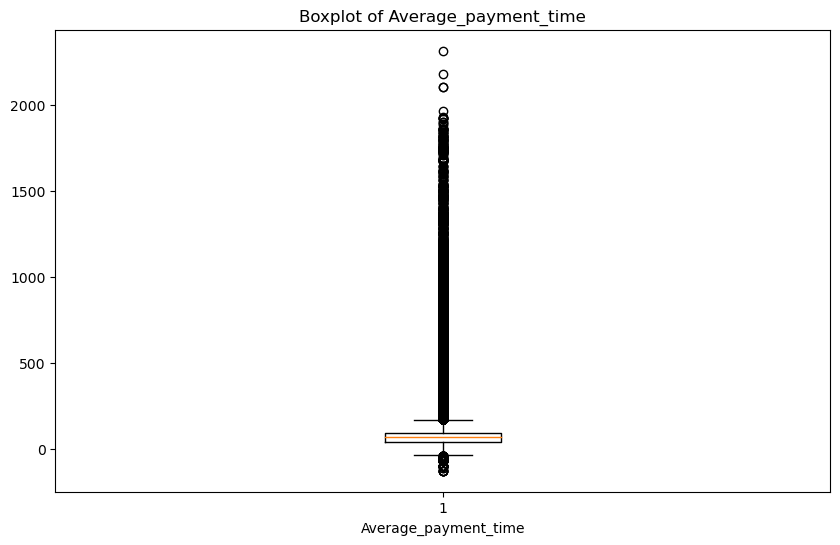

In [476]:
# Creating box plots for 'Average_payment_time'
plt.figure(figsize=(10, 6))
plt.boxplot(received_payments['Average_payment_time'])
plt.title('Boxplot of Average_payment_time')
plt.xlabel('Average_payment_time')
plt.show()

In [477]:
received_payments.shape

(93937, 19)

In [478]:
# Calculate the 0.5th and 99.5th percentiles for the 'Invoice_Age' column
percentile_1_0 = received_payments['Average_payment_time'].quantile(0.01)
percentile_99_0 = received_payments['Average_payment_time'].quantile(0.99)
print(f"Range covering 98% of data in 'Average_payment_time': {percentile_1_0} to {percentile_99_0}")


Range covering 98% of data in 'Average_payment_time': -5.0 to 1050.0


In [479]:
#Removing all the outliers dropping rows where Invoice age -5.0 to 1050.0
received_payments = received_payments[(received_payments['Average_payment_time'] >= -5) & (received_payments['Average_payment_time'] <= 1050)]

In [480]:
received_payments.shape

(92107, 19)

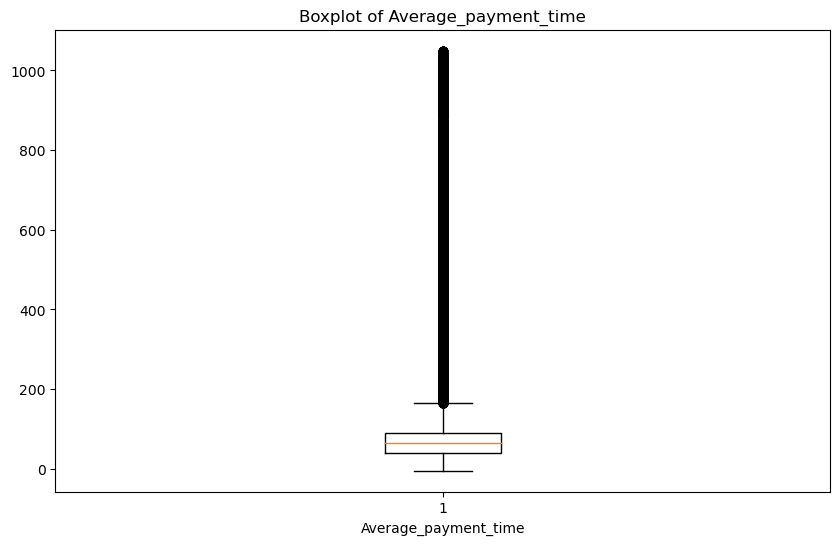

In [481]:
plt.figure(figsize=(10, 6))
plt.boxplot(received_payments['Average_payment_time'])
plt.title('Boxplot of Average_payment_time')
plt.xlabel('Average_payment_time')
plt.show()

In [166]:
received_payments['Average_payment_time'].describe()

count    92107.000000
mean       102.599021
std        148.181707
min         -5.000000
25%         40.000000
50%         65.000000
75%         90.000000
max       1050.000000
Name: Average_payment_time, dtype: float64

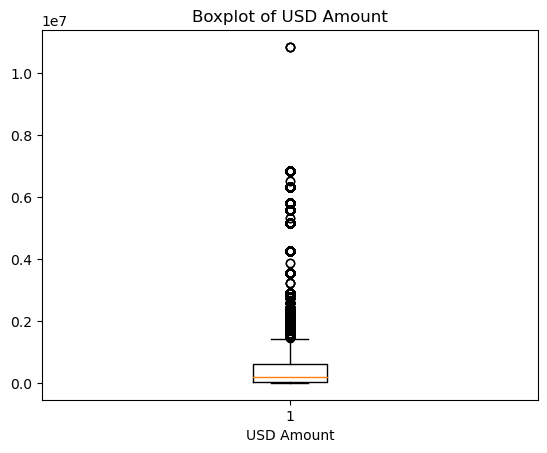

In [482]:
# Box plot for 'USD Amount'
plt.boxplot(received_payments['USD Amount'])
plt.title('Boxplot of USD Amount')
plt.xlabel('USD Amount')
plt.show()

In [483]:
#Dropping rows where the USD Amount is negative
received_payments = received_payments[received_payments['USD Amount'] >= 0]

In [484]:
# Calculate the 0.5th and 99.5th percentiles for the 'Invoice_Age' column
usd_percentile_0_5 = received_payments['USD Amount'].quantile(0.005)
usd_percentile_99_5 = received_payments['USD Amount'].quantile(0.995)
print(f"Range covering 99% of data in 'USD amount': {usd_percentile_0_5} to {usd_percentile_99_5}")

Range covering 99% of data in 'USD amount': 0.0 to 6312955.6


In [485]:
#Removing all the outliers dropping rows 
received_payments = received_payments[(received_payments['USD Amount'] >= 0) & (received_payments['USD Amount'] <= 6312955.60)]

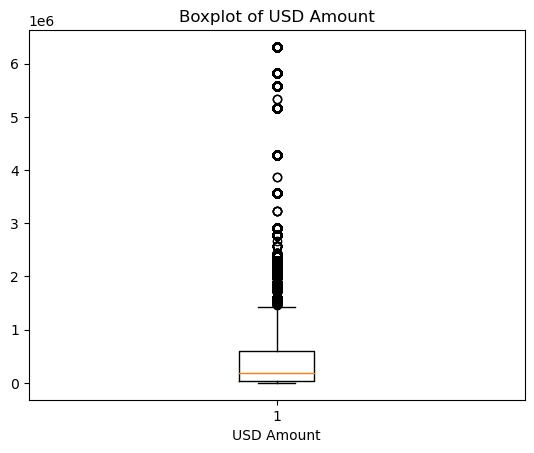

In [486]:
# Box plot for 'USD Amount'
plt.boxplot(received_payments['USD Amount'])
plt.title('Boxplot of USD Amount')
plt.xlabel('USD Amount')
plt.show()

In [487]:
#Analyzing Late Payments
received_payments.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'Payment Status', 'Payment_Terms',
       'Average_payment_time'],
      dtype='object')

In [488]:
received_payments['USD Amount'].describe()

count    9.182600e+04
mean     5.205730e+05
std      8.922167e+05
min      0.000000e+00
25%      3.791662e+04
50%      1.915624e+05
75%      5.996137e+05
max      6.312956e+06
Name: USD Amount, dtype: float64

In [489]:
received_payments['Average_payment_time'].describe()

count    91826.000000
mean       102.700433
std        148.393600
min         -5.000000
25%         40.000000
50%         65.000000
75%         90.000000
max       1050.000000
Name: Average_payment_time, dtype: float64

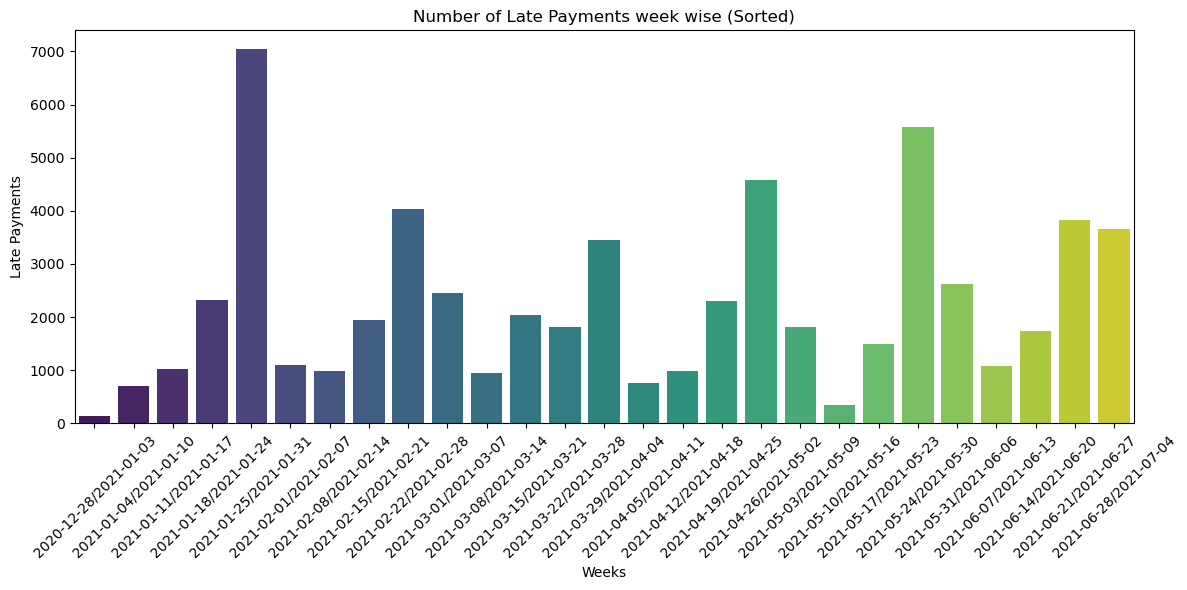

In [492]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting week from 'RECEIPT_DATE'
received_payments['Receipt_Week'] = received_payments['RECEIPT_DATE'].dt.to_period('W')

# Filter the data for instances where Payment Status is Late
target_zero_data = received_payments[received_payments['Payment Status'] == "Late Payment"]

# Sorting the 'Receipt_Week' column in chronological order
sorted_weeks = target_zero_data['Receipt_Week'].sort_values().unique()

# Plotting countplots
plt.figure(figsize=(12, 6))
sns.countplot(x='Receipt_Week', data=target_zero_data, order=sorted_weeks, palette='viridis')
plt.title('Number of Late Payments week wise (Sorted)')
plt.xlabel('Weeks')
plt.ylabel('Late Payments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Categorical Variable Analysis: Explore 'CURRENCY_CODE', 'INVOICE_TYPE' vs Target using bar charts to understand their distributions and relationships.

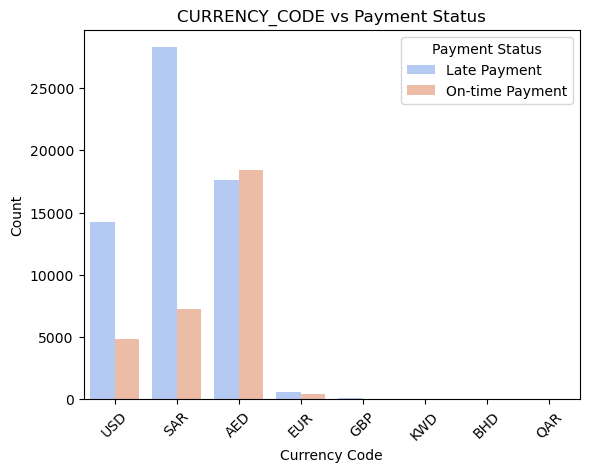

In [177]:
# Bar chart for 'CURRENCY_CODE' vs 'Payment Status'
sns.countplot(x='CURRENCY_CODE', hue='Payment Status', data=received_payments, palette='coolwarm')
plt.title('CURRENCY_CODE vs Payment Status')
plt.xlabel('Currency Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Payment Status', loc='upper right')

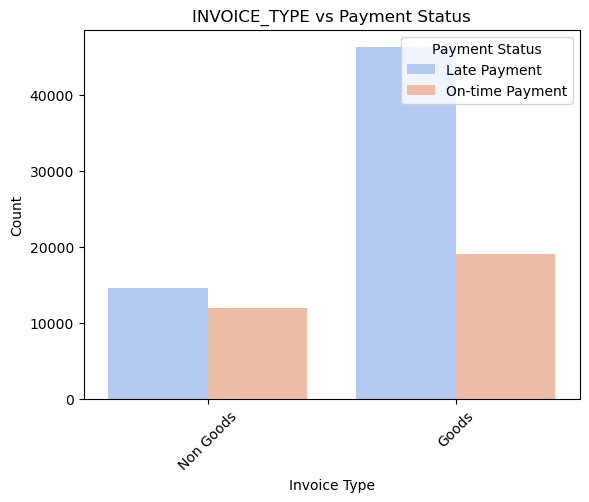

In [178]:
#Bar chart for invoice type for targets
# Bar chart for 'CURRENCY_CODE' vs 'Target'
sns.countplot(x='INVOICE_TYPE', hue='Payment Status', data=received_payments, palette='coolwarm')
plt.title('INVOICE_TYPE vs Payment Status')
plt.xlabel('Invoice Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Payment Status', loc='upper right')

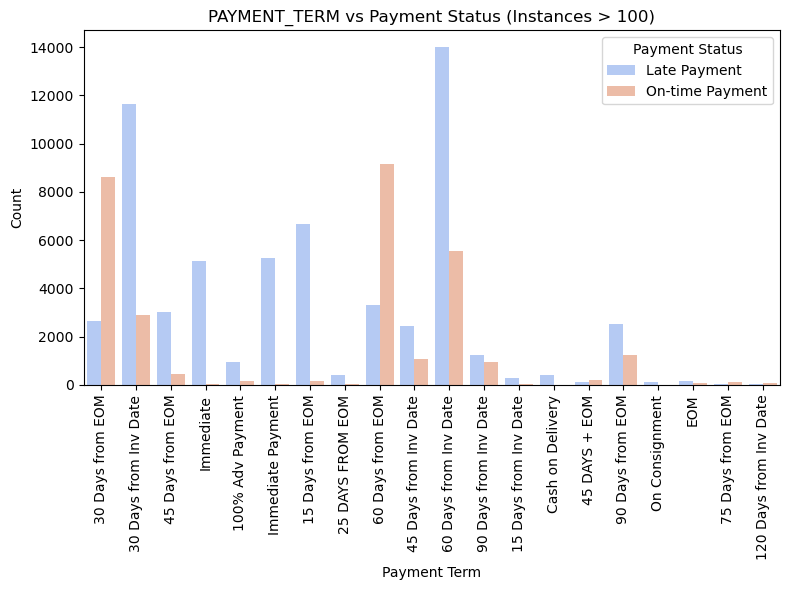

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for 'PAYMENT_TERM' categories with more than 100 instances
payment_term_counts = received_payments['PAYMENT_TERM'].value_counts()

payment_term_more_than_100 = payment_term_counts[payment_term_counts > 100].index.tolist()

filtered_data = received_payments[
    received_payments['PAYMENT_TERM'].isin(payment_term_more_than_100)
]

# Plotting bar chart for filtered 'PAYMENT_TERM' vs 'Payment Status'
plt.figure(figsize=(8, 6))
sns.countplot(x='PAYMENT_TERM', hue='Payment Status', data=filtered_data, palette='coolwarm')
plt.title('PAYMENT_TERM vs Payment Status (Instances > 100)')
plt.xlabel('Payment Term')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Payment Status', loc='upper right')
plt.tight_layout()
plt.show()


Correlation Analysis: Compute correlations between numeric variables ('USD Amount', ''Invoice_Age') to understand their relationships. Use correlation matrices or pair plots for a visual representation of correlations.

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns for correlation analysis
numeric_columns = ['Payment_Terms', 'Average_payment_time']

# Subset the data for selected numeric columns
numeric_data = received_payments[numeric_columns]
# Compute correlation matrix
correlation_matrix = numeric_data.corr()
correlation_matrix

,Payment_Terms,Average_payment_time
Payment_Terms,1.000000,-0.101892
Average_payment_time,-0.101892,1.000000


In [181]:
# Total transaction amounts for all customers
total_transactions_amount = received_payments['USD Amount'].sum()

# Total transaction amounts per customer
customer_transaction_total_amount = received_payments.groupby('CUSTOMER_NAME')['USD Amount'].sum().sort_values(ascending=False)

# Percentages of total transactions for each customer
customer_transaction_percentages = (customer_transaction_total_amount / total_transactions_amount) * 100

# Top high-value customers and their contribution in percentage
top_high_value_customers = customer_transaction_percentages.head(10)
print(top_high_value_customers)


CUSTOMER_NAME
SEPH Corp    63.937377
FARO Corp    12.027582
PARF Corp     6.695307
ALLI Corp     5.398797
AREE Corp     2.352480
HABC Corp     1.103457
RADW Corp     0.757785
L OR Corp     0.618280
CGR  Corp     0.584736
PCD  Corp     0.515891
Name: USD Amount, dtype: float64


In [182]:
total_percentage = top_high_value_customers.sum()
print(total_percentage)

93.99169204167995


### Intrestingly top 10 customers contribute to 94% of the total payment receivables

In [183]:
#Creating a list of top 10 customers
# List of top 10 customers
top_10_customers = [
    'SEPH Corp', 'FARO Corp', 'PARF Corp', 'ALLI Corp', 'AREE Corp',
    'HABC Corp', 'RADW Corp', 'L OR Corp', 'CGR  Corp', 'PCD  Corp'
]

# Filter data for top 10 customers
top_10_customers_data = received_payments[received_payments['CUSTOMER_NAME'].isin(top_10_customers)]

# Group by 'CUSTOMER_NAME' and 'Target' and count occurrences
value_counts_top_10_customers = top_10_customers_data.groupby(['CUSTOMER_NAME', 'Payment Status']).size().unstack().fillna(0)

print(value_counts_top_10_customers)


Payment Status  Late Payment  On-time Payment
CUSTOMER_NAME                                
ALLI Corp               1895             3749
AREE Corp               1589              632
CGR  Corp                192              642
FARO Corp              10594             4222
HABC Corp                996              384
L OR Corp                 55              238
PARF Corp               5612             1011
PCD  Corp                 95              100
RADW Corp                747              900
SEPH Corp              14072             8532


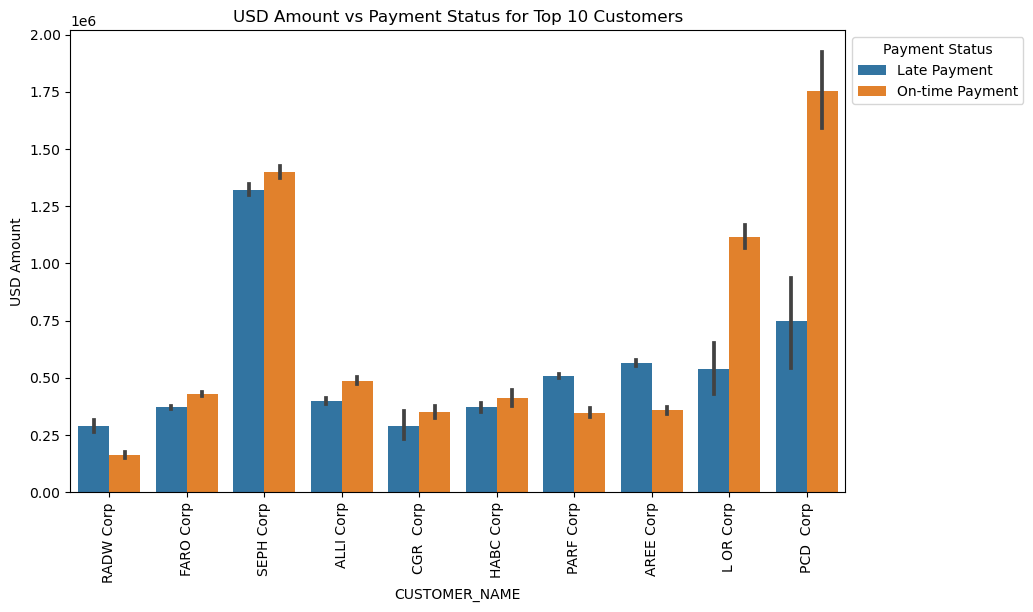

In [184]:
# Create a bar chart for 'USD Amount' vs 'Payment Status' for top 10 customers
plt.figure(figsize=(10, 6))
sns.barplot(x='CUSTOMER_NAME', y='USD Amount', hue='Payment Status', data=top_10_customers_data)
plt.title('USD Amount vs Payment Status for Top 10 Customers')
plt.xlabel('CUSTOMER_NAME')
plt.ylabel('USD Amount')
plt.xticks(rotation=90)
plt.legend(title='Payment Status', bbox_to_anchor=(1, 1))
plt.show()

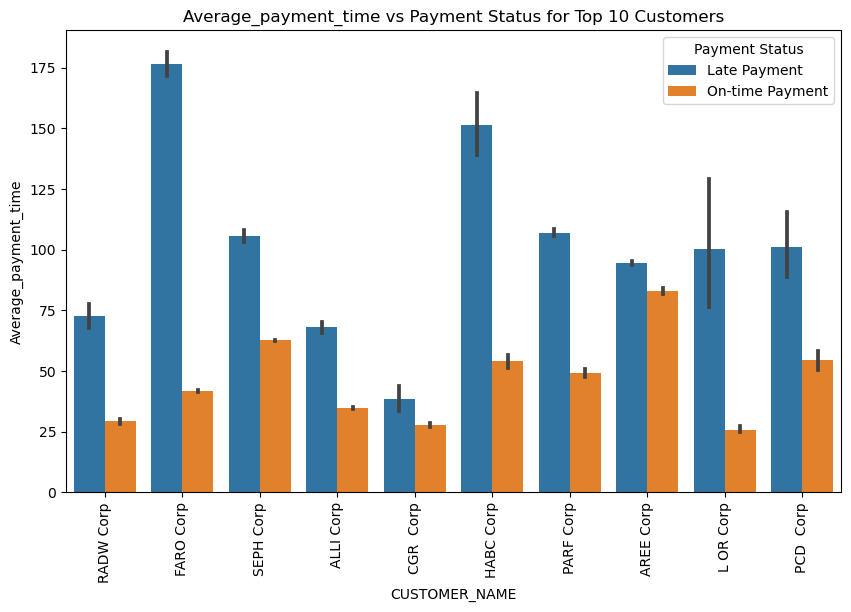

In [185]:
# Create a bar chart for 'USD Amount' vs 'Average_payment_time' for top 10 customers
plt.figure(figsize=(10, 6))
sns.barplot(x='CUSTOMER_NAME', y='Average_payment_time', hue='Payment Status', data=top_10_customers_data)
plt.title('Average_payment_time vs Payment Status for Top 10 Customers')
plt.xlabel('CUSTOMER_NAME')
plt.ylabel('Average_payment_time')
plt.xticks(rotation=90)
plt.legend(title='Payment Status', bbox_to_anchor=(1, 1))
plt.show()


In [186]:
received_payments.dtypes

RECEIPT_METHOD                   object
CUSTOMER_NAME                    object
CUSTOMER_NUMBER                  object
RECEIPT_DOC_NO                  float64
RECEIPT_DATE             datetime64[ns]
CLASS                            object
CURRENCY_CODE                    object
Local Amount                    float64
USD Amount                      float64
INVOICE_ALLOCATED                object
INVOICE_CREATION_DATE    datetime64[ns]
DUE_DATE                 datetime64[ns]
PAYMENT_TERM                     object
INVOICE_CLASS                    object
INVOICE_CURRENCY_CODE            object
INVOICE_TYPE                     object
Payment Status                   object
Payment_Terms                     int64
Average_payment_time              int64
Receipt_Week              period[W-SUN]
dtype: object

In [187]:
received_payments['Payment_Terms'].nunique()

436

# MODEL BUILDING - CUSTOMER SEGMENTATION

In [188]:
received_payments.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'Payment Status', 'Payment_Terms',
       'Average_payment_time', 'Receipt_Week'],
      dtype='object')

### Customer Segmentation

In [189]:
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [190]:
#Creating a copy of the received_payments dataset to analyze customer behavior with respect to payment
payment_data=received_payments.copy()

In [191]:
payment_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'Payment Status', 'Payment_Terms',
       'Average_payment_time', 'Receipt_Week'],
      dtype='object')

In [192]:
#Dropping non-essential columns
columns_drop=['RECEIPT_METHOD', 'CUSTOMER_NAME', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'Payment Status', 'Payment_Terms',
       'Receipt_Week']

In [193]:
# Dropping the specified columns
payment_data.drop(columns=columns_drop, inplace=True)

In [194]:
# Resetting the index
payment_data.reset_index(drop=True, inplace=True)

In [195]:
payment_data.columns

Index(['CUSTOMER_NUMBER', 'Average_payment_time'], dtype='object')

In [196]:
# Grouping the dataframe by 'CUSTOMER_NUMBER' and calculating mean and standard deviation for 'Average_payment_time'
grouped_data = payment_data.groupby('CUSTOMER_NUMBER')['Average_payment_time'].agg(['mean', 'std']).reset_index()

# Renaming the columns for clarity
grouped_data.columns = ['CUSTOMER_NUMBER', 'Mean_Payment_time', 'Std_Dev_Payment_time']

# Displaying the resulting DataFrame
print(grouped_data.head())


  CUSTOMER_NUMBER  Mean_Payment_time  Std_Dev_Payment_time
0           10100          72.500000              7.000000
1           10320          21.476190             15.542262
2           10360          39.893617             23.610272
3            1044         124.744255            185.523593
4            1076          39.864000             28.282088


In [197]:
grouped_data.describe()

,Mean_Payment_time,Std_Dev_Payment_time
count,1041.000000,876.000000
mean,98.094793,48.508436
std,124.007153,70.272116
min,-5.000000,0.000000
25%,34.727273,11.771415
50%,63.968750,23.475109
75%,107.055556,50.206955
max,957.000000,515.069898


In [198]:
grouped_data.shape

(1041, 3)

In [199]:
grouped_data.columns

Index(['CUSTOMER_NUMBER', 'Mean_Payment_time', 'Std_Dev_Payment_time'], dtype='object')

In [200]:
# Counting null values in each column of grouped_data DataFrame
null_values = grouped_data.isnull().sum()

# Displaying the count of null values in each column
print(null_values)


CUSTOMER_NUMBER           0
Mean_Payment_time         0
Std_Dev_Payment_time    165
dtype: int64


In [201]:
# Replace null values in 'Std_Dev_Payment_time' column with 0
grouped_data['Std_Dev_Payment_time'].fillna(0, inplace=True)

# Counting null values in each column of grouped_data DataFrame after replacement
null_values = grouped_data.isnull().sum()

# Displaying the count of null values in each column
print(null_values)


CUSTOMER_NUMBER         0
Mean_Payment_time       0
Std_Dev_Payment_time    0
dtype: int64


In [202]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CUSTOMER_NUMBER       1041 non-null   object 
 1   Mean_Payment_time     1041 non-null   float64
 2   Std_Dev_Payment_time  1041 non-null   float64
dtypes: float64(2), object(1)
memory usage: 24.5+ KB


In [203]:
# 2. rescaling the data set before clustering
cluster_df = grouped_data[['Mean_Payment_time',
       'Std_Dev_Payment_time']]
# instantiate the scaler
scaler = StandardScaler()

# fit_transform
cluster_df_scaled = scaler.fit_transform(cluster_df)
cluster_df_scaled.shape


(1041, 2)

#### Machine learning Modelling 

In [204]:
#Starting k-means clustering with some arbitrary number of k(=4)
kmeans=KMeans(n_clusters=4, max_iter=50)
kmeans.fit(cluster_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [205]:
kmeans.labels_

array([3, 3, 3, ..., 3, 2, 0])

In [206]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    # initialize kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cluster_df_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(cluster_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.758424589055525
For n_clusters=3, the silhouette score is 0.7632371528094708
For n_clusters=4, the silhouette score is 0.5716262276551339
For n_clusters=5, the silhouette score is 0.43987364533905876
For n_clusters=6, the silhouette score is 0.44526082627473057
For n_clusters=7, the silhouette score is 0.44070377340320815
For n_clusters=8, the silhouette score is 0.441499020945072


In [207]:
# final model with k=3
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(cluster_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [208]:
# assign the label
grouped_data['cluster_id'] = kmeans.labels_
grouped_data.head()

,CUSTOMER_NUMBER,Mean_Payment_time,Std_Dev_Payment_time,cluster_id
0,10100,72.500000,7.000000,0
1,10320,21.476190,15.542262,0
2,10360,39.893617,23.610272,0
3,1044,124.744255,185.523593,2
4,1076,39.864000,28.282088,0


In [209]:
grouped_data['cluster_id'].value_counts()

0    927
2     78
1     36
Name: cluster_id, dtype: int64

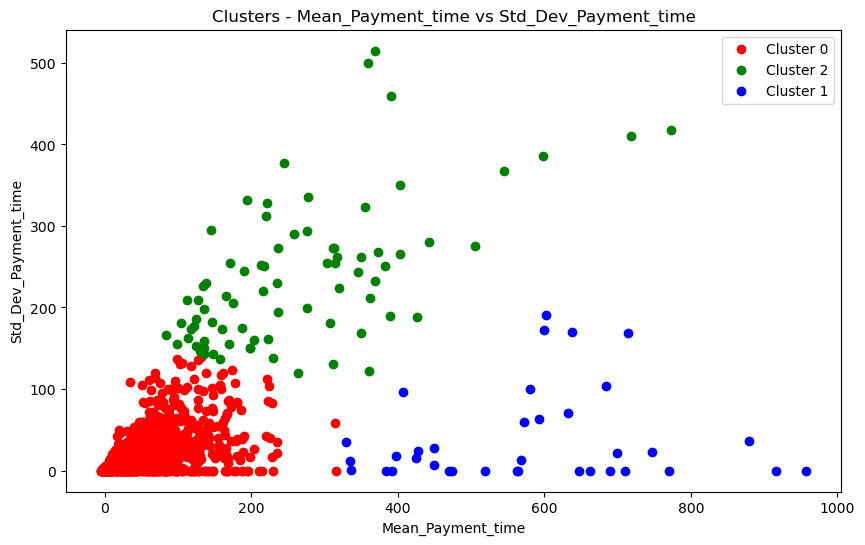

In [210]:
import matplotlib.pyplot as plt

# Define colors for each cluster
colors = ['red', 'blue', 'green',]  

# Scatter plot: USD Amount vs frequency colored by cluster_id
plt.figure(figsize=(10, 6))
for cluster in grouped_data['cluster_id'].unique():
    data = grouped_data[grouped_data['cluster_id'] == cluster]
    plt.scatter(data['Mean_Payment_time'], data['Std_Dev_Payment_time'], color=colors[cluster], label=f'Cluster {cluster}')
plt.xlabel('Mean_Payment_time')
plt.ylabel('Std_Dev_Payment_time')
plt.title('Clusters - Mean_Payment_time vs Std_Dev_Payment_time')
plt.legend()
plt.show()




In [211]:
import plotly.express as px

# Define colors for each cluster
colors = ['red', 'blue', 'green']

# Create a scatter plot using Plotly
fig = px.scatter(grouped_data, x='Mean_Payment_time', y='Std_Dev_Payment_time', color='cluster_id',
                 color_discrete_sequence=colors, labels={'Mean_Payment_time': 'Mean Payment Time',
                                                          'Std_Dev_Payment_time': 'Std Dev Payment Time'},
                 title='Clusters - Mean Payment Time vs Std Dev Payment Time', hover_name='CUSTOMER_NUMBER')

# Show the plot
fig.show()


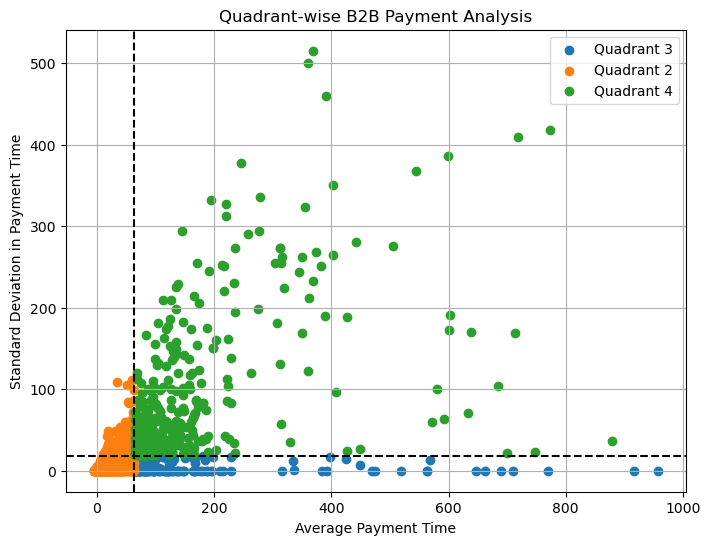

In [212]:
import matplotlib.pyplot as plt

# Assume 'grouped_data' contains the required data

# Define quadrants based on average and standard deviation thresholds
mean_threshold = grouped_data['Mean_Payment_time'].median()
std_threshold = grouped_data['Std_Dev_Payment_time'].median()

# Create a new column to categorize quadrants
grouped_data['Quadrant'] = 'Quadrant 1'
grouped_data.loc[grouped_data['Mean_Payment_time'] <= mean_threshold, 'Quadrant'] = 'Quadrant 2'
grouped_data.loc[(grouped_data['Mean_Payment_time'] > mean_threshold) & (grouped_data['Std_Dev_Payment_time'] <= std_threshold), 'Quadrant'] = 'Quadrant 3'
grouped_data.loc[(grouped_data['Mean_Payment_time'] > mean_threshold) & (grouped_data['Std_Dev_Payment_time'] > std_threshold), 'Quadrant'] = 'Quadrant 4'

# Plotting quadrant-wise behavior
plt.figure(figsize=(8, 6))

for quadrant in grouped_data['Quadrant'].unique():
    data = grouped_data[grouped_data['Quadrant'] == quadrant]
    plt.scatter(data['Mean_Payment_time'], data['Std_Dev_Payment_time'], label=quadrant)

plt.axvline(x=mean_threshold, color='black', linestyle='--')
plt.axhline(y=std_threshold, color='black', linestyle='--')

plt.xlabel('Average Payment Time')
plt.ylabel('Standard Deviation in Payment Time')
plt.title('Quadrant-wise B2B Payment Analysis')
plt.legend()
plt.grid(True)
plt.show()


# Model Building - Predictive Modelling


In [213]:
received_payments.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'Payment Status', 'Payment_Terms',
       'Average_payment_time', 'Receipt_Week'],
      dtype='object')

In [214]:
grouped_data.columns

Index(['CUSTOMER_NUMBER', 'Mean_Payment_time', 'Std_Dev_Payment_time',
       'cluster_id', 'Quadrant'],
      dtype='object')

In [215]:
#We need to map the clusters obtained from the Customer Segmentation Process to the receivables dataset
# Merge the two DataFrames based on 'CUSTOMER_NUMBER'
# Create a dictionary mapping 'CUSTOMER_NUMBER' to 'cluster_id' from grouped_data
customer_cluster_dict = dict(zip(grouped_data['CUSTOMER_NUMBER'], grouped_data['cluster_id']))

# Map 'cluster_id' to 'received_payments' DataFrame using the created dictionary
received_payments['cluster_id'] = received_payments['CUSTOMER_NUMBER'].map(customer_cluster_dict)

received_payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91826 entries, 0 to 93936
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         91826 non-null  object        
 1   CUSTOMER_NAME          91826 non-null  object        
 2   CUSTOMER_NUMBER        91826 non-null  object        
 3   RECEIPT_DOC_NO         91797 non-null  float64       
 4   RECEIPT_DATE           91826 non-null  datetime64[ns]
 5   CLASS                  91826 non-null  object        
 6   CURRENCY_CODE          91826 non-null  object        
 7   Local Amount           91826 non-null  float64       
 8   USD Amount             91826 non-null  float64       
 9   INVOICE_ALLOCATED      91826 non-null  object        
 10  INVOICE_CREATION_DATE  91826 non-null  datetime64[ns]
 11  DUE_DATE               91826 non-null  datetime64[ns]
 12  PAYMENT_TERM           91826 non-null  object        
 13  I

In [216]:
#Checking if there are some cluster IDs which are Null
received_payments['cluster_id'].isnull().sum()

0

AWSESOME!!!

In [217]:
received_payments.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'Payment Status', 'Payment_Terms',
       'Average_payment_time', 'Receipt_Week', 'cluster_id'],
      dtype='object')

In [218]:
#Columns to be dropped from logistical regression
columns_to_be_dropped=['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'Local Amount', 
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'CURRENCY_CODE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'Receipt_Week','Average_payment_time']

In [219]:
#Dropping non consequential columns which are not important for building of the model
received_payments = received_payments.drop(columns=columns_to_be_dropped, axis=1)

In [220]:
received_payments.head()

,USD Amount,Payment Status,Payment_Terms,cluster_id
0,101018.63040,Late Payment,58,0
1,48990.21133,Late Payment,30,0
2,41991.60971,On-time Payment,30,0
3,41991.60971,Late Payment,30,2
4,41991.60971,Late Payment,30,0


In [221]:
received_payments.dtypes

USD Amount        float64
Payment Status     object
Payment_Terms       int64
cluster_id          int64
dtype: object

In [222]:
# Convert 'cluster_id' to categorical variable
received_payments['cluster_id'] = received_payments['cluster_id'].astype('category')


Dummy variable creation
The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [223]:
# Create dummy variables for specified columns
dummy = pd.get_dummies(received_payments[['cluster_id']], drop_first=True)

# Add the results to the master dataframe
received_payments = pd.concat([received_payments, dummy], axis=1)


In [224]:
received_payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91826 entries, 0 to 93936
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   USD Amount      91826 non-null  float64 
 1   Payment Status  91826 non-null  object  
 2   Payment_Terms   91826 non-null  int64   
 3   cluster_id      91826 non-null  category
 4   cluster_id_1    91826 non-null  uint8   
 5   cluster_id_2    91826 non-null  uint8   
dtypes: category(1), float64(1), int64(1), object(1), uint8(2)
memory usage: 3.1+ MB


In [225]:
received_payments['cluster_id'].unique()               

[0, 2, 1]
Categories (3, int64): [0, 1, 2]

In [226]:
# Drop the 'cluster_id' and 'CURRENCY_CODE' columns from the merged dataframe
received_payments.drop(['cluster_id'], axis=1, inplace=True)


In [227]:
received_payments.columns

Index(['USD Amount', 'Payment Status', 'Payment_Terms', 'cluster_id_1',
       'cluster_id_2'],
      dtype='object')

In [228]:
received_payments['Payment Status'].unique()

array(['Late Payment', 'On-time Payment'], dtype=object)

In [229]:
# Rename 'Payment Status' column to 'Late payment'
received_payments.rename(columns={'Payment Status': 'Late payment'}, inplace=True)

# Map 'Late Payment' to 1 and 'On-time Payment' to 0
received_payments['Late payment'] = received_payments['Late payment'].map({'Late Payment': 1, 'On-time Payment': 0})

# Display the updated dataframe
print(received_payments.head())


     USD Amount  Late payment  Payment_Terms  cluster_id_1  cluster_id_2
0  101018.63040             1             58             0             0
1   48990.21133             1             30             0             0
2   41991.60971             0             30             0             0
3   41991.60971             1             30             0             1
4   41991.60971             1             30             0             0


### Test-Train Split
The next step is to split the dataset into training an testing sets.

In [230]:
# Import the required library
from sklearn.model_selection import train_test_split

In [231]:
# Assuming 'received_payments' contains your data
# Selecting features and target variable
features = ['USD Amount', 'Payment_Terms', 'cluster_id_1', 'cluster_id_2']
target = 'Late payment'  

# Creating feature matrix (X) and target vector (y)
X = received_payments[features]
y = received_payments[target]

In [232]:
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling the two numerical variables using the Min Max Scaler

In [233]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
minmaxscaler=MinMaxScaler()
X_train[['USD Amount','Payment_Terms']] = minmaxscaler.fit_transform(X_train[['USD Amount','Payment_Terms']])
X_train.head()

,USD Amount,Payment_Terms,cluster_id_1,cluster_id_2
36382,0.002817,0.923501,0,1
45915,0.070331,0.918736,0,0
47236,0.130462,0.915726,0,1
18621,0.108911,0.923501,0,1
33652,0.176406,0.923501,0,1


## Building a Classification Model

In [495]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

# Display classification report
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.6406998693190068
              precision    recall  f1-score   support

           0       0.48      0.73      0.58      9205
           1       0.81      0.60      0.69     18343

    accuracy                           0.64     27548
   macro avg       0.65      0.66      0.63     27548
weighted avg       0.70      0.64      0.65     27548



In [496]:
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Predict on the test data with the tuned model
tuned_clf = grid_search.best_estimator_
y_pred = tuned_clf.predict(X_test)

# Display classification report
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.8753696052640179
              precision    recall  f1-score   support

           0       0.47      0.73      0.57      9205
           1       0.81      0.59      0.68     18343

    accuracy                           0.64     27548
   macro avg       0.64      0.66      0.63     27548
weighted avg       0.70      0.64      0.65     27548



### Business Insights and Recommendation

# MODEL DEPLOYMENT - TESTING THE MODEL ON OPEN INVOICES DATA

#### Loding the data set for open Invoices as Well 

In [421]:
# Load open invoice data
open_invoices = pd.read_csv(r'C:\Users\sanka\Downloads\MS in Data Science Folder\Domain Case Study - Retail & B2B e-commerce\Open_Invoice_data.csv',encoding='latin1')

In [422]:
open_invoices.columns

Index(['AS_OF_DATE', 'Customer Type', 'Customer_Name', 'Customer Account No',
       'Transaction Number', 'Transaction Date', 'Payment Term', 'Due Date',
       'Transaction Currency', 'Local Amount', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE'],
      dtype='object')

In [423]:
open_invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AS_OF_DATE            88204 non-null  object 
 1   Customer Type         88204 non-null  object 
 2   Customer_Name         88204 non-null  object 
 3   Customer Account No   88201 non-null  float64
 4   Transaction Number    88195 non-null  object 
 5   Transaction Date      88204 non-null  object 
 6   Payment Term          88204 non-null  object 
 7   Due Date              88204 non-null  object 
 8   Transaction Currency  88204 non-null  object 
 9   Local Amount          88204 non-null  object 
 10  Transaction Class     88204 non-null  object 
 11  AGE                   88204 non-null  int64  
 12  USD Amount            88204 non-null  object 
 13  INV_CREATION_DATE     88204 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 9.4+ MB


In [424]:
#Creating a copy of the open invoices dataset to perform data manipulatations
open_invoices_test=open_invoices.copy()

In [425]:
open_invoices_test.columns

Index(['AS_OF_DATE', 'Customer Type', 'Customer_Name', 'Customer Account No',
       'Transaction Number', 'Transaction Date', 'Payment Term', 'Due Date',
       'Transaction Currency', 'Local Amount', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE'],
      dtype='object')

In [426]:
open_invoices_test.shape

(88204, 14)

In [427]:
# Remove rows where 'AGE' column is less than 0
open_invoices_test = open_invoices_test[open_invoices_test['AGE'] >= 0]

In [428]:
open_invoices_test.shape

(60124, 14)

In [429]:
open_invoices_test.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
19,04-APR-2022 01:07:01,Related Party,CGR Corp,3694.0,100220000078,15/02/2022,30 Days from EOM,30/03/2022,AED,"1,440",INVOICE,6,"1,440",2/15/2022 15:41
20,04-APR-2022 01:07:01,Related Party,CGR Corp,3694.0,100220000081,15/02/2022,30 Days from EOM,30/03/2022,AED,"1,144",INVOICE,6,"1,144",2/15/2022 15:41


In [430]:

# Convert 'AS_OF_DATE' , INV_CREATION_DATE' and 'Due Date' columns to datetime format
open_invoices_test['INV_CREATION_DATE'] = pd.to_datetime(open_invoices_test['INV_CREATION_DATE'])
open_invoices_test['Due Date'] = pd.to_datetime(open_invoices_test['Due Date'])
open_invoices_test['AS_OF_DATE'] = pd.to_datetime(open_invoices_test['AS_OF_DATE'])

# Calculate the difference between 'Due Date' and 'INV_CREATION_DATE' to get 'PAYMENT_TERM'
open_invoices_test['PAYMENT_TERM'] = (open_invoices_test['Due Date'] - open_invoices_test['INV_CREATION_DATE']).dt.days

#Caculating the Difference between 'Due Date' and 'AS_OF_DATE' to get the payment time which is left to pay the amount
open_invoices_test['Average_payment_time'] = (open_invoices_test['Due Date'] - open_invoices_test['AS_OF_DATE']).dt.days

In [431]:
open_invoices_test.columns

Index(['AS_OF_DATE', 'Customer Type', 'Customer_Name', 'Customer Account No',
       'Transaction Number', 'Transaction Date', 'Payment Term', 'Due Date',
       'Transaction Currency', 'Local Amount', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE', 'PAYMENT_TERM',
       'Average_payment_time'],
      dtype='object')

In [432]:
# Remove rows where 'Average_payment_time' is less than 0
open_invoices_test = open_invoices_test[open_invoices_test['Average_payment_time'] >= 0]

In [433]:
open_invoices_test.shape

(3639, 16)

In [434]:
open_invoices_test['Customer Account No'] = open_invoices_test['Customer Account No'].astype(str)

In [435]:
#Converting the 'USD Columns to foalt format so that it could be fed into the machine learning model
open_invoices_test['USD Amount'] = open_invoices_test['USD Amount'].str.replace(',', '').astype(float)

In [436]:
# Remove observations where invoice value is less than 0
open_invoices_test = open_invoices_test[open_invoices_test['USD Amount'] >= 0]

## Performing customer segmentation on the Open invoice dataset

In [437]:
#Creating a copy of the received_payments dataset to analyze customer behavior with respect to payment
open_invoice_data_for_segmentation=open_invoices_test.copy()

In [438]:
open_invoice_data_for_segmentation.columns

Index(['AS_OF_DATE', 'Customer Type', 'Customer_Name', 'Customer Account No',
       'Transaction Number', 'Transaction Date', 'Payment Term', 'Due Date',
       'Transaction Currency', 'Local Amount', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE', 'PAYMENT_TERM',
       'Average_payment_time'],
      dtype='object')

In [439]:
open_invoice_data_for_segmentation = open_invoice_data_for_segmentation[['Customer Account No', 'Average_payment_time']]


In [440]:
open_invoice_data_for_segmentation.columns

Index(['Customer Account No', 'Average_payment_time'], dtype='object')

In [441]:
# Grouping the dataframe by 'CUSTOMER_NUMBER' and calculating mean and standard deviation for 'Average_payment_time'
open_invoice_grouped_data = open_invoice_data_for_segmentation.groupby('Customer Account No')['Average_payment_time'].agg(['mean', 'std']).reset_index()

# Renaming the columns for clarity
open_invoice_grouped_data.columns = ['Customer Account No', 'Mean_Payment_time', 'Std_Dev_Payment_time']

# Displaying the resulting DataFrame
print(open_invoice_grouped_data.head())


  Customer Account No  Mean_Payment_time  Std_Dev_Payment_time
0             10100.0             240.00                   NaN
1             10320.0             104.50            108.187338
2              1044.0             150.76             60.717667
3              1154.0             180.00              0.000000
4             11940.0             181.00                   NaN


In [442]:
open_invoice_grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Account No   273 non-null    object 
 1   Mean_Payment_time     273 non-null    float64
 2   Std_Dev_Payment_time  146 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.5+ KB


In [390]:
# Replace null values in 'Std_Dev_Payment_time' column with 0
open_invoice_grouped_data['Std_Dev_Payment_time'].fillna(0, inplace=True)

# Counting null values in each column of grouped_data DataFrame after replacement
open_invoice_null_values = open_invoice_grouped_data.isnull().sum()
print(open_invoice_null_values)

Customer Account No     0
Mean_Payment_time       0
Std_Dev_Payment_time    0
dtype: int64


In [391]:
# 2. rescaling the data set before clustering
open_invoice_cluster_df = open_invoice_grouped_data[['Mean_Payment_time','Std_Dev_Payment_time']]
# instantiate the scaler
scaler = StandardScaler()

# fit_transform
open_invoice_cluster_df_scaled = scaler.fit_transform(open_invoice_cluster_df)
open_invoice_cluster_df_scaled.shape

(273, 2)

In [392]:
#Starting k-means clustering with some arbitrary number of k(=3)
kmeans=KMeans(n_clusters=3, max_iter=50)
kmeans.fit(open_invoice_cluster_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [393]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    # initialize kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(open_invoice_cluster_df_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(open_invoice_cluster_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.47672276376255823
For n_clusters=3, the silhouette score is 0.6346113550882715
For n_clusters=4, the silhouette score is 0.5673041610934656
For n_clusters=5, the silhouette score is 0.5226927242519539
For n_clusters=6, the silhouette score is 0.5260691843866082
For n_clusters=7, the silhouette score is 0.5373902927483252
For n_clusters=8, the silhouette score is 0.561781905063255


In [394]:
# final model with k=3
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(open_invoice_cluster_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [395]:
# assign the label
open_invoice_grouped_data['open_invoice_cluster_id'] = kmeans.labels_
open_invoice_grouped_data.head()

,Customer Account No,Mean_Payment_time,Std_Dev_Payment_time,open_invoice_cluster_id
0,10100.0,240.00,0.000000,2
1,10320.0,104.50,108.187338,0
2,1044.0,150.76,60.717667,0
3,1154.0,180.00,0.000000,2
4,11940.0,181.00,0.000000,2


In [396]:
open_invoice_grouped_data['open_invoice_cluster_id'].value_counts()

2    113
0     81
1     79
Name: open_invoice_cluster_id, dtype: int64

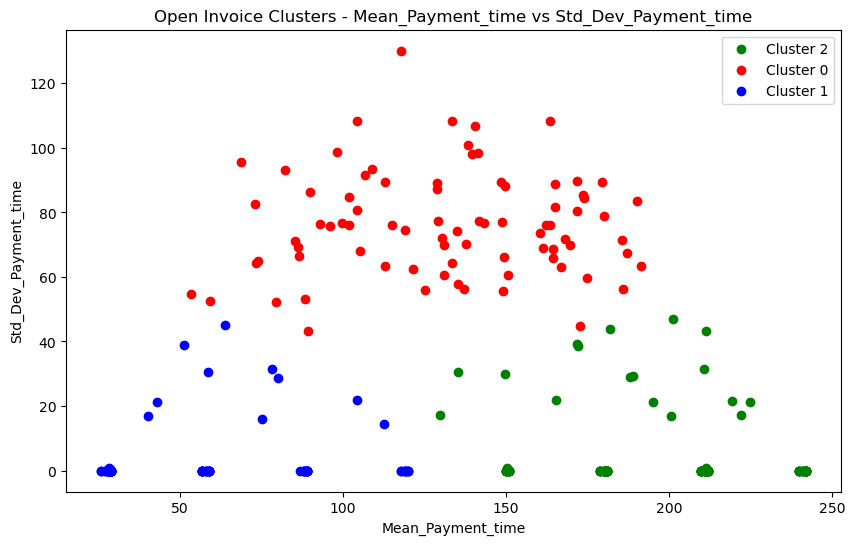

In [397]:
import matplotlib.pyplot as plt

# Define colors for each cluster
colors = ['red', 'blue', 'green',]  

# Scatter plot: USD Amount vs frequency colored by cluster_id
plt.figure(figsize=(10, 6))
for cluster in open_invoice_grouped_data['open_invoice_cluster_id'].unique():
    data = open_invoice_grouped_data[open_invoice_grouped_data['open_invoice_cluster_id'] == cluster]
    plt.scatter(data['Mean_Payment_time'], data['Std_Dev_Payment_time'], color=colors[cluster], label=f'Cluster {cluster}')
plt.xlabel('Mean_Payment_time')
plt.ylabel('Std_Dev_Payment_time')
plt.title('Open Invoice Clusters - Mean_Payment_time vs Std_Dev_Payment_time')
plt.legend()
plt.show()


In [398]:
import plotly.express as px

# Define colors for each cluster
colors = ['red', 'blue', 'green']

# Create a scatter plot using Plotly
fig = px.scatter(open_invoice_grouped_data, x='Mean_Payment_time', y='Std_Dev_Payment_time', color='open_invoice_cluster_id',
                 color_discrete_sequence=colors, labels={'Mean_Payment_time': 'Mean_Payment_time',
                                                         'Std_Dev_Payment_time': 'Std_Dev_Payment_time'},
                 title='Open Invoice Clusters - Mean_Payment_time vs Std_Dev_Payment_time',
                 hover_data=['open_invoice_cluster_id'])

fig.show()


In [399]:
open_invoice_grouped_data.columns

Index(['Customer Account No', 'Mean_Payment_time', 'Std_Dev_Payment_time',
       'open_invoice_cluster_id'],
      dtype='object')

In [402]:
# Create a dictionary mapping 'Customer Account No' to 'open_invoice_cluster_id' from grouped_data
open_invoice_customer_cluster_dict = dict(zip(open_invoice_grouped_data['Customer Account No'], open_invoice_grouped_data['open_invoice_cluster_id']))

# Map 'cluster_id' to 'open_invoices_test' DataFrame using the created dictionary
open_invoices_test['open_invoice_cluster_id'] = open_invoices_test['Customer Account No'].map(open_invoice_customer_cluster_dict)



In [403]:
open_invoices_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2984 entries, 23 to 88184
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   AS_OF_DATE               2984 non-null   datetime64[ns]
 1   Customer Type            2984 non-null   object        
 2   Customer_Name            2984 non-null   object        
 3   Customer Account No      2984 non-null   object        
 4   Transaction Number       2984 non-null   object        
 5   Transaction Date         2984 non-null   object        
 6   Payment Term             2984 non-null   object        
 7   Due Date                 2984 non-null   datetime64[ns]
 8   Transaction Currency     2984 non-null   object        
 9   Local Amount             2984 non-null   object        
 10  Transaction Class        2984 non-null   object        
 11  AGE                      2984 non-null   int64         
 12  USD Amount               2984 no

In [404]:
# We will create categorical columns for clusters as well
#Checking if there are some cluster IDs which are Null
open_invoices_test['open_invoice_cluster_id'].isnull().sum()

0

AWESOME

In [405]:
open_invoices_test.columns

Index(['AS_OF_DATE', 'Customer Type', 'Customer_Name', 'Customer Account No',
       'Transaction Number', 'Transaction Date', 'Payment Term', 'Due Date',
       'Transaction Currency', 'Local Amount', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE', 'PAYMENT_TERM',
       'Average_payment_time', 'open_invoice_cluster_id'],
      dtype='object')

In [406]:
#Removing columns which are not there in the model which we had created by using the received_payments dataset
open_invoices_columns_to_be_dropped=['AS_OF_DATE', 'Customer Type', 'Customer_Name', 
       'Transaction Number', 'Transaction Date', 'Due Date',
       'Transaction Currency', 'Local Amount', 'Transaction Class', 'AGE', 'INV_CREATION_DATE', 'Payment Term',]


In [407]:
#Dropping non consequential columns which are not important for getting the test set raedy
open_invoices_test = open_invoices_test.drop(columns=open_invoices_columns_to_be_dropped, axis=1)

In [408]:
open_invoices_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2984 entries, 23 to 88184
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer Account No      2984 non-null   object 
 1   USD Amount               2984 non-null   float64
 2   PAYMENT_TERM             2984 non-null   int64  
 3   Average_payment_time     2984 non-null   int64  
 4   open_invoice_cluster_id  2984 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 139.9+ KB


# RENAMING THE VARIABLES OF THE OPEN INVOICE DATA SO THAT THEY MATCH THE VAIABLES IN THE MODEL


In [412]:
open_invoices_test['open_invoice_cluster_id'].nunique()

open_invoice_cluster_id    3
open_invoice_cluster_id    3
dtype: int64

In [410]:
# Create dummy variables for specified columns
open_invoice_dummy = pd.get_dummies(open_invoices_test[['open_invoice_cluster_id']], drop_first=True)

# Add the results to the master dataframe
open_invoices_test = pd.concat([open_invoices_test, open_invoice_dummy], axis=1)

In [411]:
open_invoices_test.head()

,Customer Account No,USD Amount,PAYMENT_TERM,Average_payment_time,open_invoice_cluster_id,open_invoice_cluster_id
23,4013.0,4107.0,175,57,1,1
24,7544.0,317.0,145,26,0,0
56,1044.0,101.0,323,210,0,0
64,53521.0,21561.0,234,150,0,0
65,53521.0,30573.0,234,150,0,0


In [413]:
# Dictionary with old column names as keys and new column names as values
new_column_names_open_invoices = {
    'Customer Account No': 'CUSTOMER_NUMBER',
    'USD Amount': 'USD Amount',
    'PAYMENT_TERM': 'Payment_Terms',
    'open_invoice_cluster_id': 'cluster_id_1',
    'open_invoice_cluster_id': 'cluster_id_2'
}

# Rename columns using the rename() function
open_invoices_test = open_invoices_test.rename(columns=new_column_names_open_invoices)

In [414]:
open_invoices_test.columns

Index(['CUSTOMER_NUMBER', 'USD Amount', 'Payment_Terms',
       'Average_payment_time', 'cluster_id_2', 'cluster_id_2'],
      dtype='object')

In [415]:
# Drop 'CUSTOMER_NUMBER' and 'Average_payment_time' columns
open_invoices_test = open_invoices_test.drop(columns=['CUSTOMER_NUMBER', 'Average_payment_time'])


In [416]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
minmaxscaler=MinMaxScaler()
open_invoices_test[['USD Amount','Payment_Terms']] = minmaxscaler.fit_transform(open_invoices_test[['USD Amount','Payment_Terms']])
open_invoices_test.head()

,USD Amount,Payment_Terms,cluster_id_2,cluster_id_2
23,0.007793,0.357724,1,1
24,0.000601,0.276423,0,0
56,0.000192,0.758808,0,0
64,0.040909,0.517615,0,0
65,0.058009,0.517615,0,0


# This is the final Open Invoice Test Dataset which we will used to predict whether customer will pay or not.

In [ ]:
#'open_invoices_test' is a DataFrame and 'tuned_clf' is the tuned model
tuned_clf = grid_search.best_estimator_

# Predict on the test data
open_invoices_pred = tuned_clf.predict(open_invoices_test)

# Create a DataFrame with the predicted values
open_invoivces_predictions_df = pd.DataFrame(open_invoices_pred, columns=['Predicted_Labels'])

# Display the predictions DataFrame
print(predictions_df)
